In [1]:
!pip install --upgrade pip

In [2]:
!pip install gdown
!pip install tensorflow_text

In [3]:
!pip install wordcloud

In [4]:
!pip install tensorflow-gpu

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

2023-01-06 13:22:47.470096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 13:22:47.610994: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-06 13:22:48.235129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-06 13:22:48.235200: W tensorflow/

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [3]:
an_ds = pd.read_csv('./merged_data.csv')
an_ds.shape

(4202421, 18)

In [4]:
an_ds.head()

,app_id,name,developer,publisher,positive,negative,average_forever,median_forever,languages,genre,ccu,tags,metacritic_score,total_recommendations,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,"Easy to learn, hard to master.",1,1


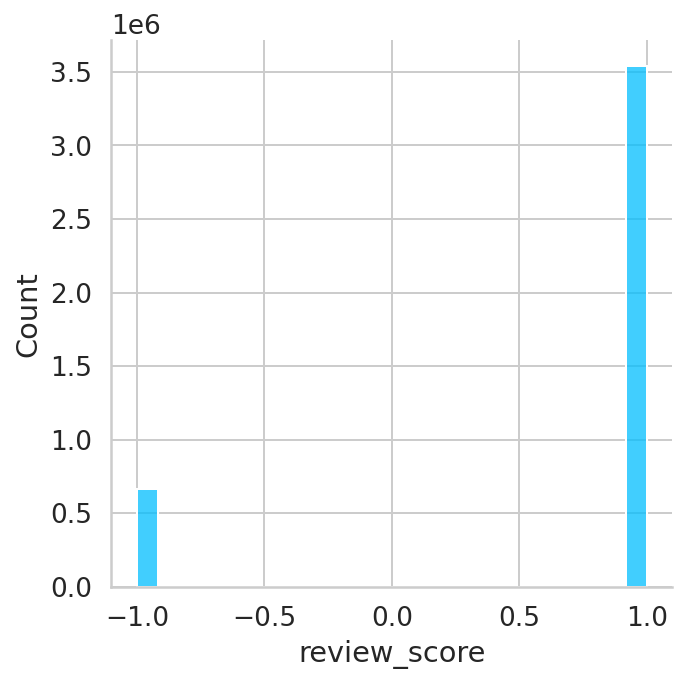

In [5]:
sns.displot(an_ds.review_score)

In [4]:
an_ds['review_type'] = an_ds['review_score'].apply(lambda x: "bad" if x == -1 else "good")

<AxesSubplot:xlabel='review_type', ylabel='count'>

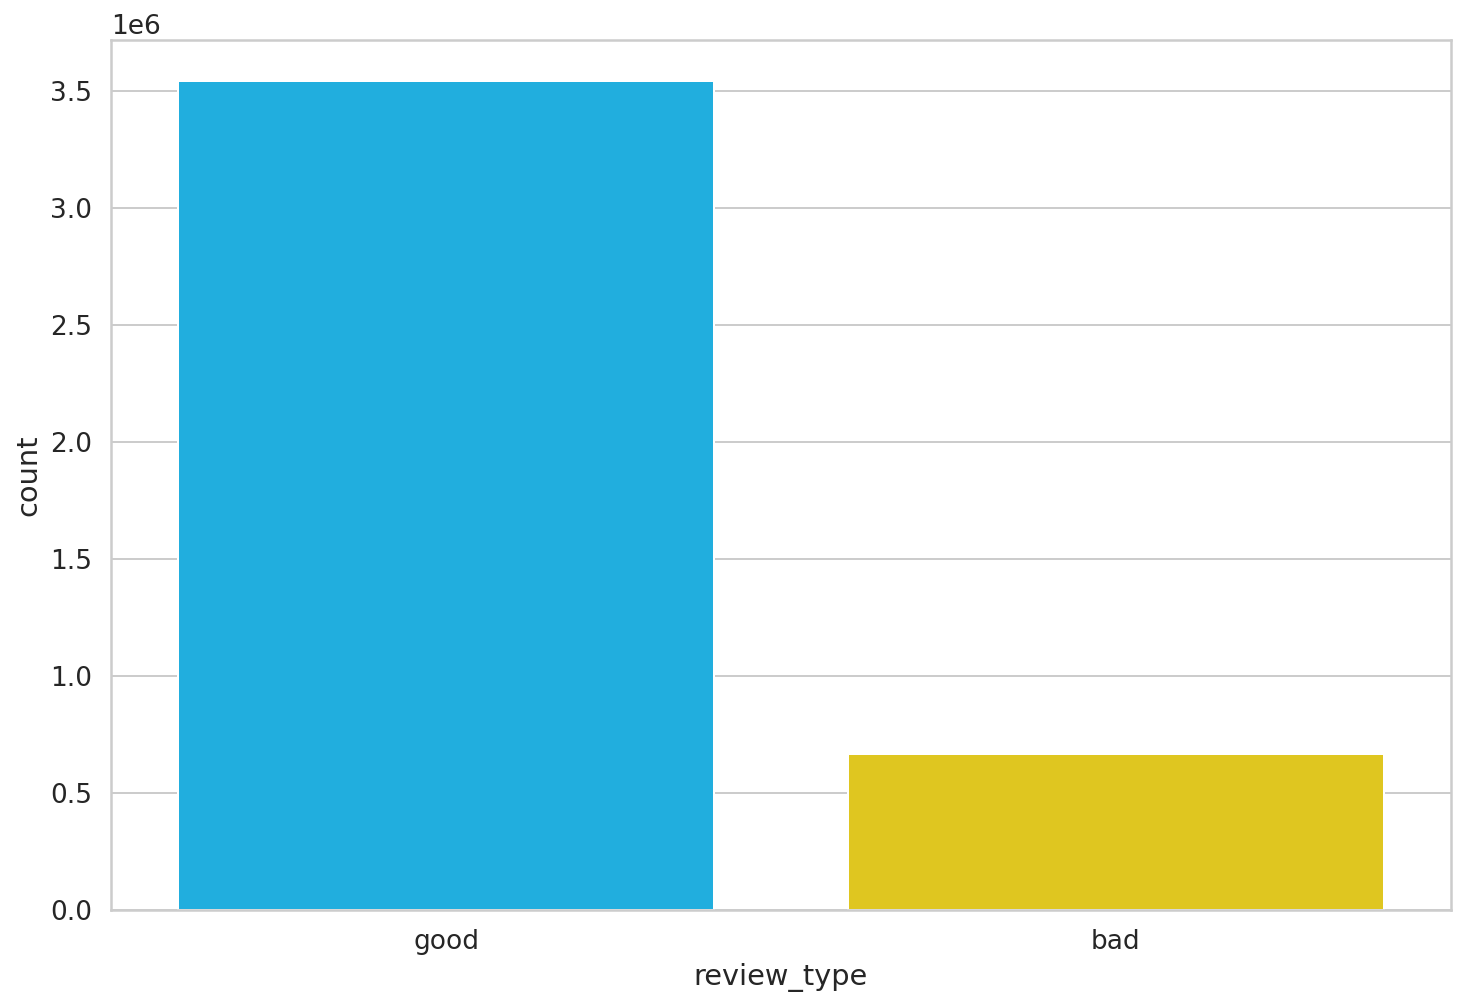

In [7]:
sns.countplot(x = an_ds.review_type)

In [5]:
good_reviews = an_ds[an_ds.review_type == 'good']
bad_reviews = an_ds[an_ds.review_type == 'bad']

good_reviews = good_reviews.assign(review_text = lambda d: d['review_text'].astype(str))
bad_reviews = bad_reviews.assign(review_text = lambda d: d['review_text'].astype(str))

In [6]:
good_reviews_text = " ".join(good_reviews.review_text.to_numpy().tolist())
bad_reviews_text = " ".join(bad_reviews.review_text.to_numpy().tolist())

In [10]:
good_reviews_cloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(good_reviews_text)
bad_reviews_cloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(bad_reviews_text)

In [11]:
def show_word_cloud(cloud):
    plt.figure(figsize = (16, 10))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

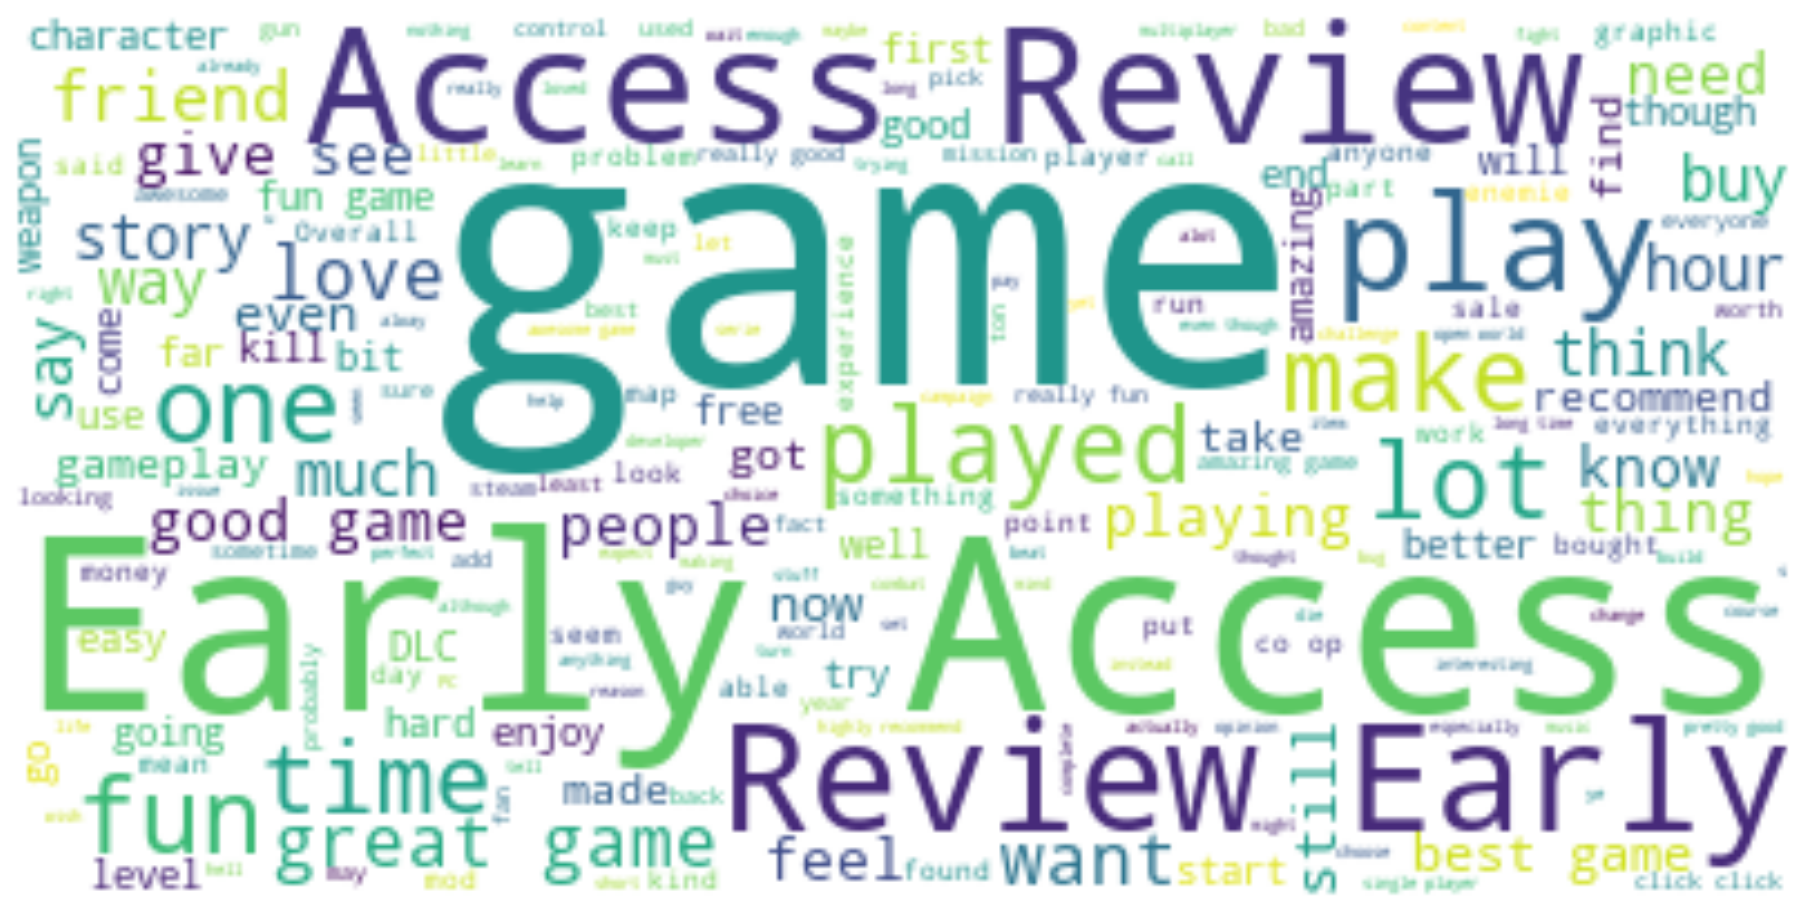

In [12]:
show_word_cloud(good_reviews_cloud)

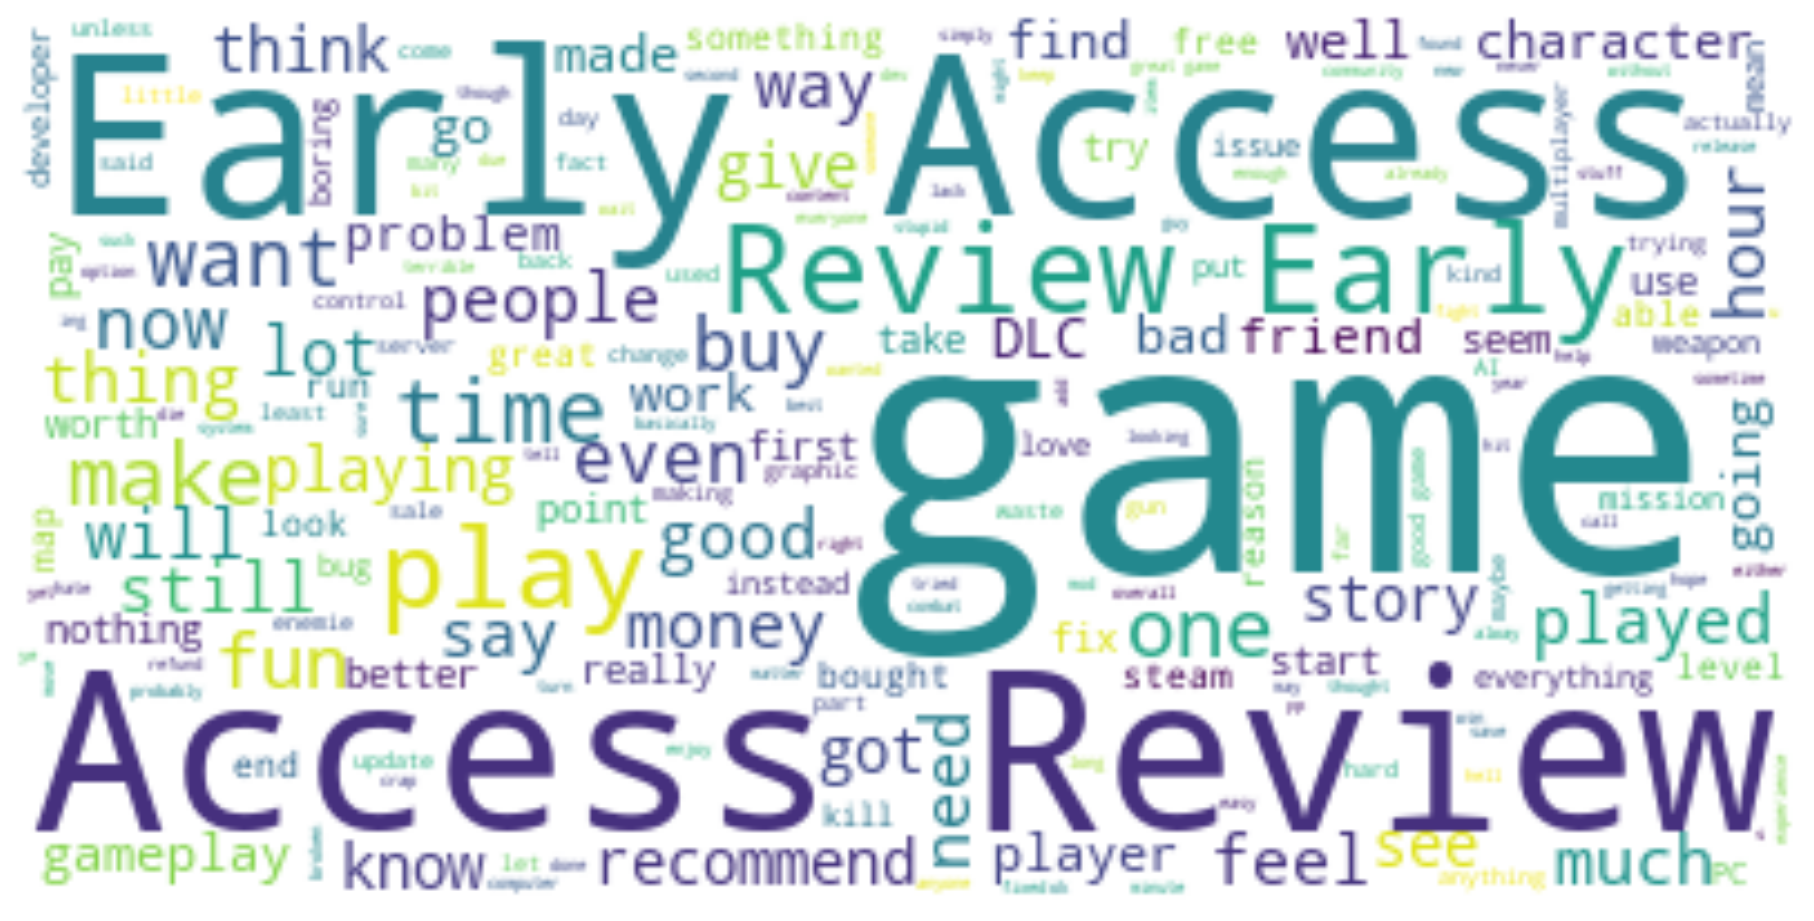

In [13]:
show_word_cloud(bad_reviews_cloud)

In [7]:
good_df = good_reviews.sample(n = len(bad_reviews), random_state = RANDOM_SEED)
bad_df = bad_reviews

In [8]:
print(good_df.shape, bad_df.shape)

(662886, 19) (662886, 19)


In [9]:
review_df = pd.concat([good_df, bad_df]).reset_index(drop = True)

In [17]:
review_df.head()

,app_id,name,developer,publisher,positive,negative,average_forever,median_forever,languages,genre,ccu,tags,metacritic_score,total_recommendations,app_name,review_text,review_score,review_votes,review_type
0,292030,The Witcher 3: Wild Hunt,CD PROJEKT RED,CD PROJEKT RED,663683,27959,3928,954,"English, French, Italian, German, Spanish - Sp...",RPG,73038,"{'Open World': 11788, 'RPG': 10107, 'Story Ric...",93.0,638120.0,The Witcher 3: Wild Hunt,"Sod the bosoms, asses and brilliant story, buy...",1,1,good
1,242920,Banished,Shining Rock Software LLC,Shining Rock Software LLC,35293,3838,1276,571,English,"Indie, Simulation, Strategy",1220,"{'City Builder': 3658, 'Colony Sim': 3383, 'St...",73.0,34179.0,Banished,Farmers starving while harvesting crops. 10/10,1,0,good
2,383870,Firewatch,Campo Santo,"Panic, Campo Santo",52627,6663,241,232,"English, Russian, French, German, Spanish - Sp...","Adventure, Indie",203,"{'Adventure': 1592, 'Atmospheric': 1534, 'Stor...",81.0,55206.0,Firewatch,This is a story about two people. To expect an...,1,0,good
3,233720,Surgeon Simulator,Bossa Studios,tinyBuild,13005,2778,313,167,"English, French, Italian, German, Spanish - Sp...","Action, Indie, Simulation",40,"{'Simulation': 1140, 'Funny': 1134, 'Comedy': ...",71.0,12806.0,Surgeon Simulator,It's got Donald. Buy it.,1,0,good
4,65980,Sid Meier's Civilization: Beyond Earth,"Firaxis Games, Aspyr (Mac), Aspyr (Linux)","2K, Aspyr (Mac), Aspyr (Linux)",12558,8789,1494,621,"English, French, Italian, German, Spanish - Sp...",Strategy,691,"{'Strategy': 932, 'Turn-Based Strategy': 815, ...",81.0,12884.0,Sid Meier's Civilization: Beyond Earth,Im just going to put this out there beccause a...,1,0,good


In [10]:
review_df = review_df[["review_text", "review_type"]]

In [19]:
review_df.head()

,review_text,review_type
0,"Sod the bosoms, asses and brilliant story, buy...",good
1,Farmers starving while harvesting crops. 10/10,good
2,This is a story about two people. To expect an...,good
3,It's got Donald. Buy it.,good
4,Im just going to put this out there beccause a...,good


<AxesSubplot:xlabel='review_type', ylabel='count'>

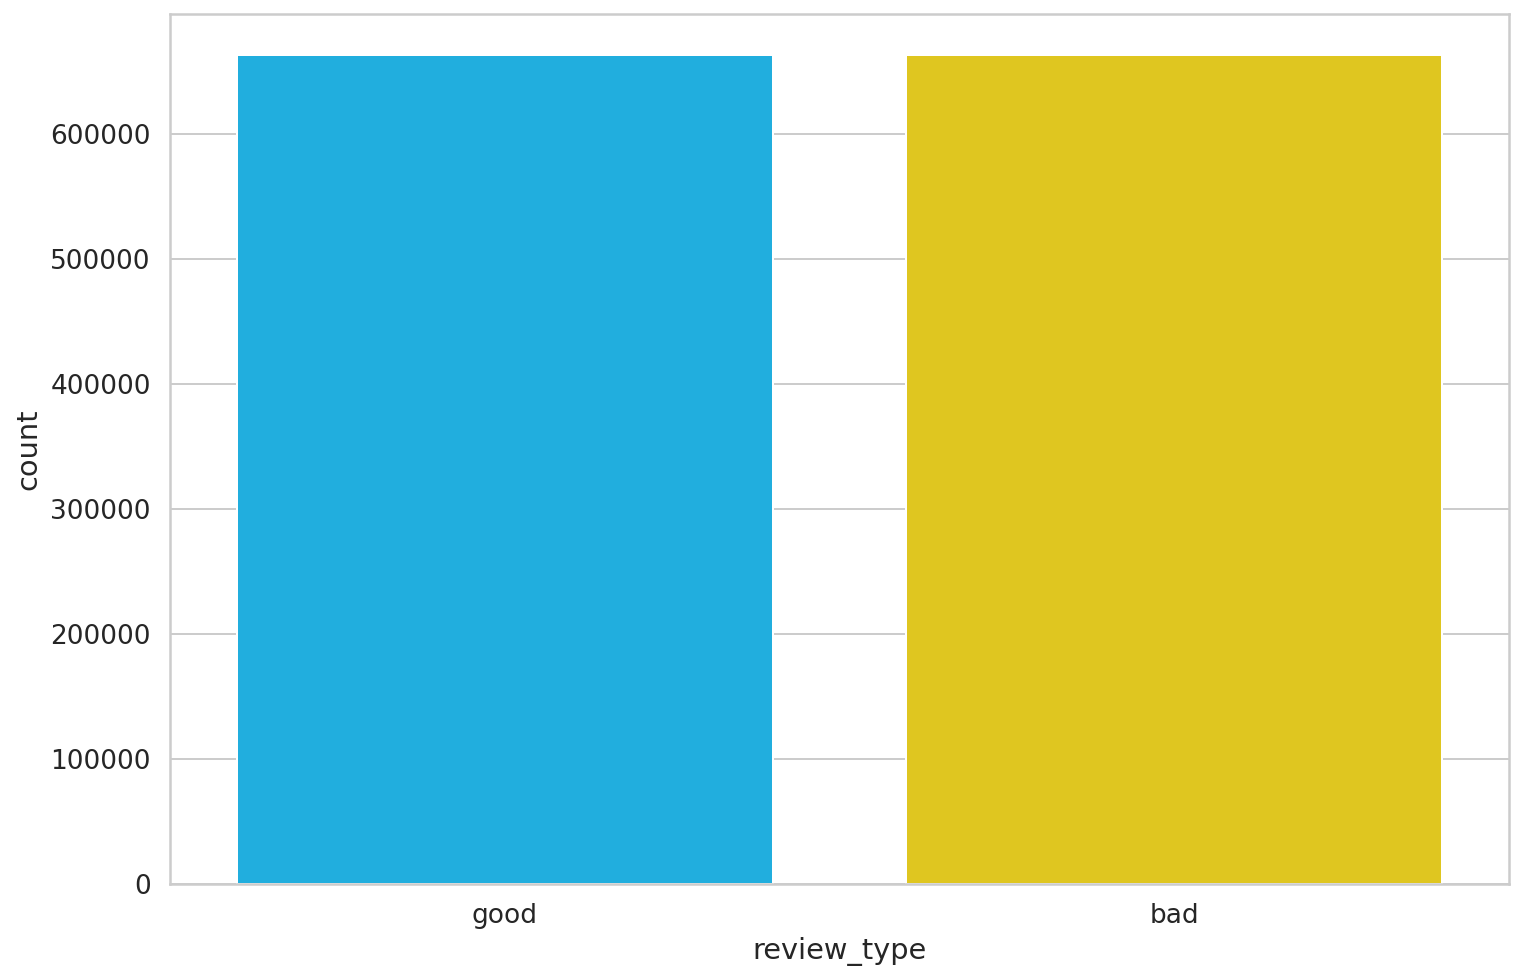

In [20]:
sns.countplot(x = review_df.review_type)